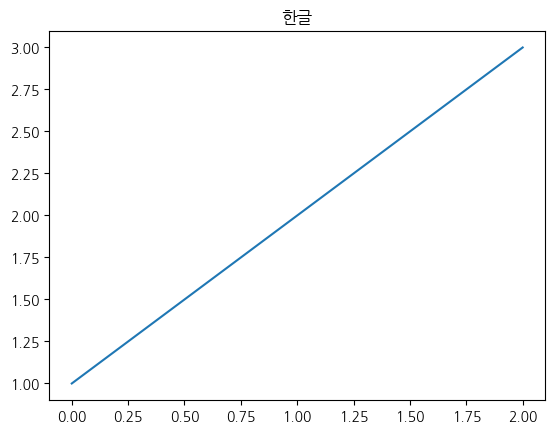

In [7]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

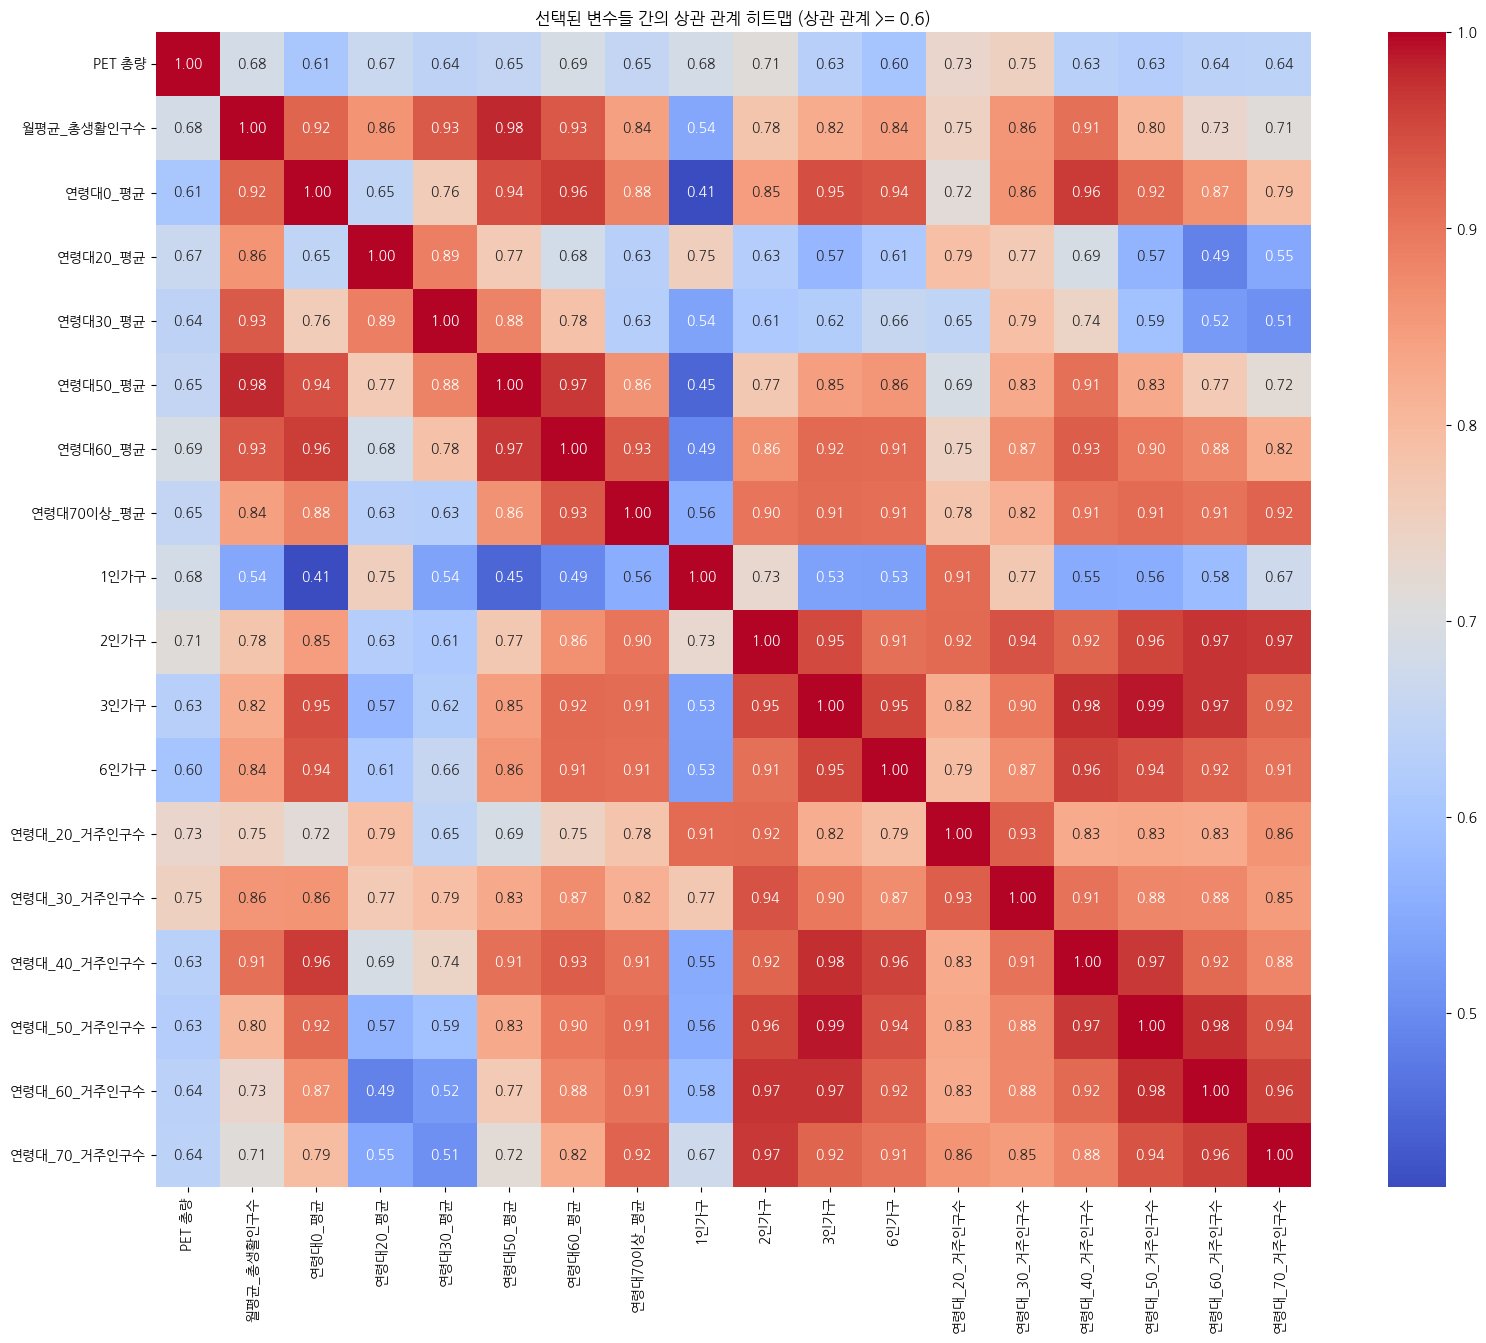

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/for_model_total.csv')
df.insert(0, 'PET 총량', df.pop('PET 총량'))
DF = df.drop(df.columns[1], axis=1)

# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0.6
correlation_with_pet = DF.corr()['PET 총량']
selected_variables = [col for col in correlation_with_pet.index if abs(correlation_with_pet[col]) >= correlation_threshold]

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = DF[selected_variables]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()

# 데이터 정리

In [9]:
print(df.columns)

Index(['PET 총량', '자치구', '월평균_총생활인구수', '연령대0_평균', '연령대10_평균', '연령대20_평균',
       '연령대30_평균', '연령대40_평균', '연령대50_평균', '연령대60_평균', '연령대70이상_평균', '1인가구',
       '2인가구', '3인가구', '4인가구', '5인가구', '6인가구', '7인 이상 가구', '연령대_100',
       '연령대_0_거주인구수', '연령대_10_거주인구수', '연령대_20_거주인구수', '연령대_30_거주인구수',
       '연령대_40_거주인구수', '연령대_50_거주인구수', '연령대_60_거주인구수', '연령대_70_거주인구수',
       '연령대_80_거주인구수', '연령대_90_거주인구수', '유흥주점영업', '단란주점', '제과점영업', '집단급식소',
       '일반음식점', '휴게음식점'],
      dtype='object')


# 파생변수

In [10]:
df = pd.read_csv('data/for_model_total.csv')

DF['연령대_2030_거주인구수_합'] = df['연령대_20_거주인구수'] + df['연령대_30_거주인구수']
DF['연령대_2030_생활인구수_합'] = df['연령대20_평균'] + df['연령대30_평균']

DF['연령대_2030_거주인구수_평균'] = (df['연령대_20_거주인구수'] + df['연령대_30_거주인구수']) / 2
DF['연령대_2030_생활인구수_평균'] = (df['연령대20_평균'] + df['연령대30_평균']) / 2

DF['연령대_20_거주인구수_비율'] = df['연령대_20_거주인구수'] / (df['연령대_0_거주인구수'] + df['연령대_10_거주인구수'] + df['연령대_20_거주인구수'] + df['연령대_30_거주인구수'] + df['연령대_40_거주인구수'] + df['연령대_50_거주인구수'] + df['연령대_60_거주인구수'] + df['연령대_70_거주인구수'] + df['연령대_80_거주인구수'] + df['연령대_90_거주인구수'] + df['연령대_100'])

DF['연령대_30_거주인구수_비율'] = df['연령대_30_거주인구수'] / (df['연령대_0_거주인구수'] + df['연령대_10_거주인구수'] + df['연령대_20_거주인구수'] + df['연령대_30_거주인구수'] + df['연령대_40_거주인구수'] + df['연령대_50_거주인구수'] + df['연령대_60_거주인구수'] + df['연령대_70_거주인구수'] + df['연령대_80_거주인구수'] + df['연령대_90_거주인구수'] + df['연령대_100'])

DF['연령대_2030_거주인구수_비율'] = (df['연령대_20_거주인구수'] + df['연령대_30_거주인구수']) / (df['연령대_0_거주인구수'] + df['연령대_10_거주인구수'] + df['연령대_20_거주인구수'] + df['연령대_30_거주인구수'] + df['연령대_40_거주인구수'] + df['연령대_50_거주인구수'] + df['연령대_60_거주인구수'] + df['연령대_70_거주인구수'] + df['연령대_80_거주인구수'] + df['연령대_90_거주인구수'] + df['연령대_100'])

DF['1인가구_비율'] = df['1인가구'] / (df['1인가구'] + df['2인가구'] + df['3인가구'] + df['4인가구'] + df['5인가구'] + df['6인가구'] + df['7인 이상 가구'])

DF['식품접객업'] = df['일반음식점'] + df['휴게음식점'] + df['제과점영업'] + df['유흥주점영업'] + df['단란주점'] + df['집단급식소']

DF['음식점'] = df['일반음식점'] + df['휴게음식점']

DF['주점'] = df['일반음식점'] + df['유흥주점영업'] + df['단란주점']

#주요 경제활동인구 = 경제활동 = 소비량 = 배출량 올라간다?
DF['주요경제활동인구_거주인구수'] = df['연령대_20_거주인구수']+df['연령대_30_거주인구수']+df['연령대_40_거주인구수']+df['연령대_50_거주인구수']
DF['주요경제활동인구_거주인구수_평균'] = (df['연령대_20_거주인구수']+df['연령대_30_거주인구수']+df['연령대_40_거주인구수']+df['연령대_50_거주인구수']) / 4

DF['주요경제활동인구_생활인구수'] = df['연령대20_평균']+df['연령대30_평균']+df['연령대40_평균']+df['연령대50_평균']
DF['주요경제활동인구_생활인구수_평균'] = (df['연령대20_평균']+df['연령대30_평균']+df['연령대40_평균']+df['연령대50_평균']) / 4


DF.head(2)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인 이상 가구,연령대_100,연령대_0_거주인구수,연령대_10_거주인구수,연령대_20_거주인구수,연령대_30_거주인구수,연령대_40_거주인구수,연령대_50_거주인구수,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,연령대_2030_거주인구수_합,연령대_2030_생활인구수_합,연령대_2030_거주인구수_평균,연령대_2030_생활인구수_평균,연령대_20_거주인구수_비율,연령대_30_거주인구수_비율,연령대_2030_거주인구수_비율,1인가구_비율,식품접객업,음식점,주점,주요경제활동인구_거주인구수,주요경제활동인구_거주인구수_평균,주요경제활동인구_생활인구수,주요경제활동인구_생활인구수_평균
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,71046,53275,44046,37272,7736,1488,371,154.416667,33177.916667,54883.000000,71170.750000,76109.333333,92528.833333,77089.250000,58011.583333,32993.833333,11749.000000,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0,147280.083333,2.061729e+08,73640.041667,1.030865e+08,0.139558,0.149242,0.288800,0.330087,234814.0,216715.0,172317.0,316898.166667,79224.541667,3.971775e+08,9.929437e+07
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,50316,47737,39447,31455,6659,1241,282,125.166667,29137.083333,33109.333333,53416.083333,62451.666667,64231.250000,62544.083333,57224.666667,27460.583333,9633.416667,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0,115867.750000,9.979316e+07,57933.875000,4.989658e+07,0.133223,0.155758,0.288981,0.284051,68318.0,60497.0,49733.0,242643.083333,60660.770833,2.154371e+08,5.385927e+07


# 추가 후 다시 상관관계

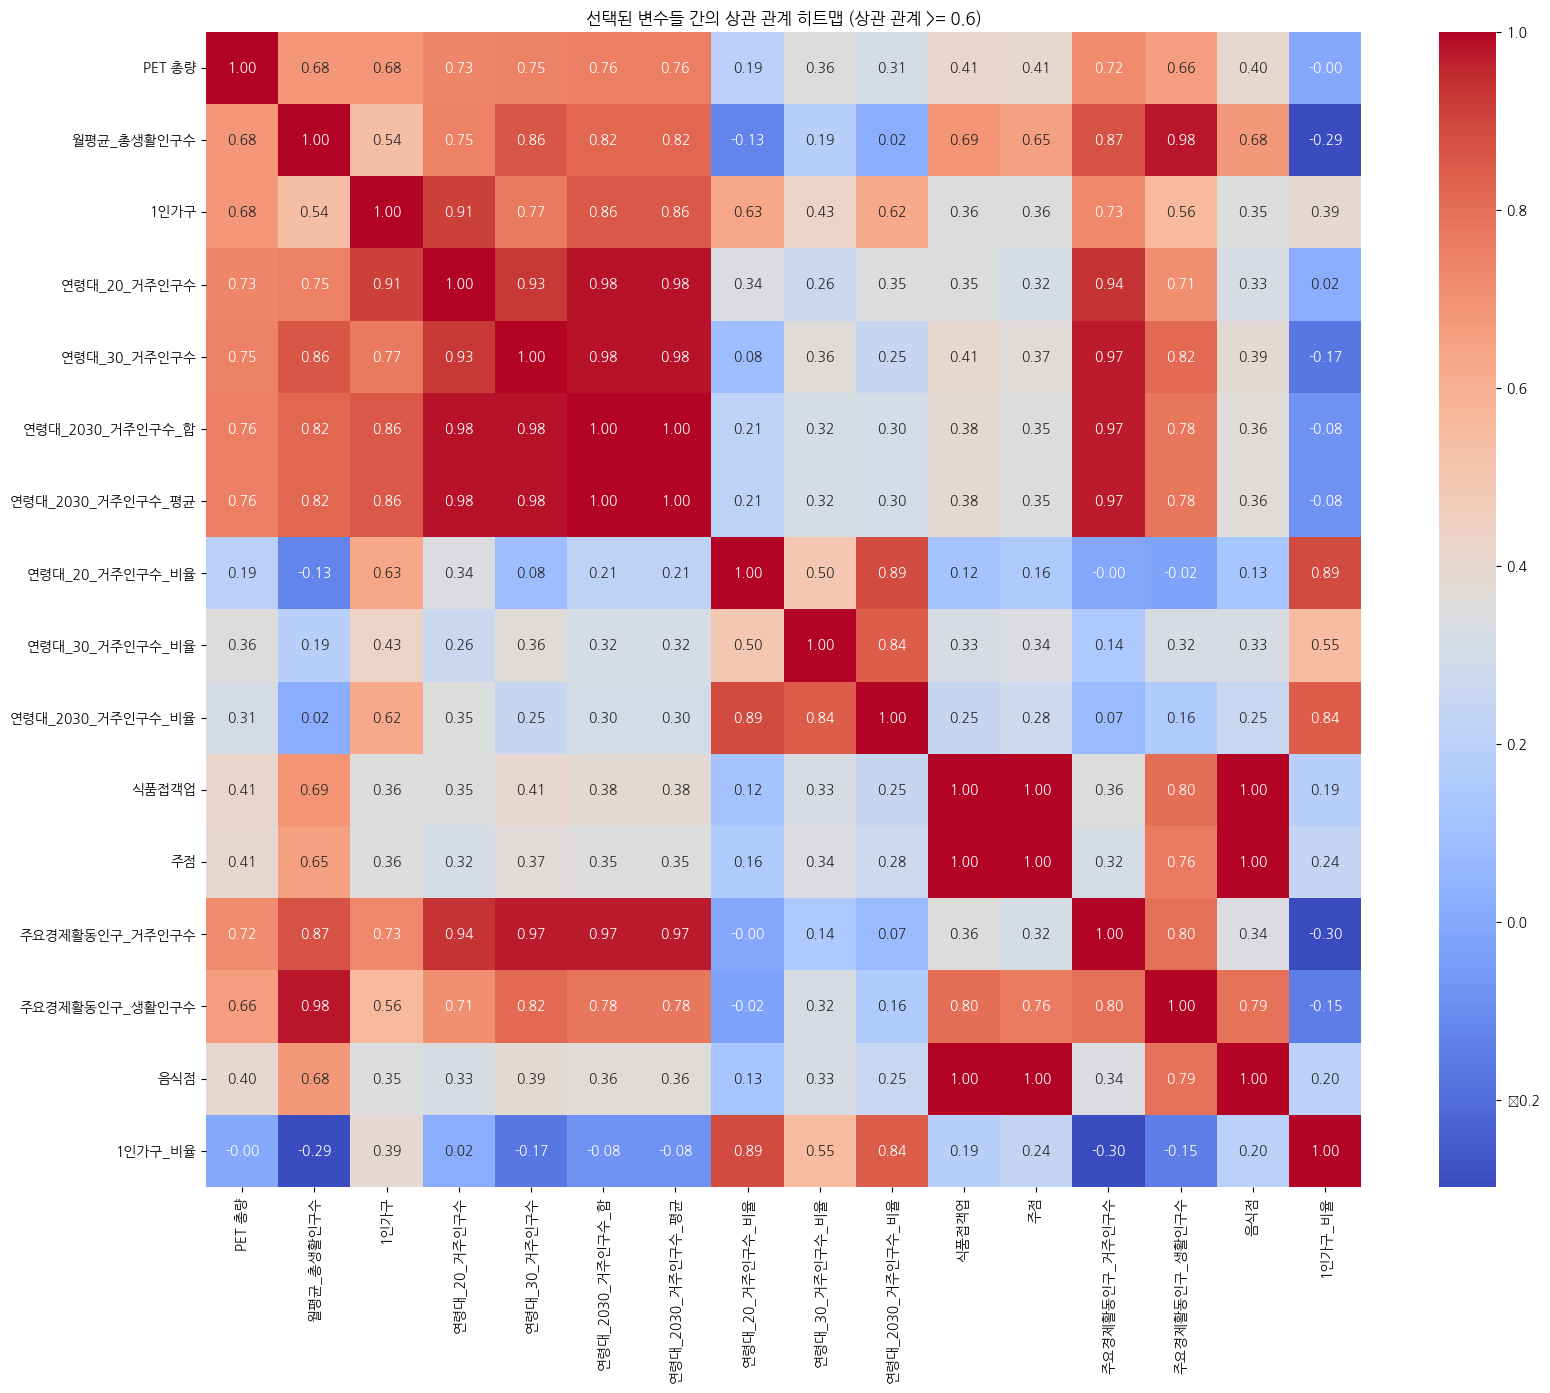

In [19]:
# 'PET 총량' 변수와의 상관 관계가 0.6 이상인 변수
correlation_threshold = 0.6
correlation_with_pet = DF.corr()['PET 총량']

# 선택된 변수들 간의 상관 관계 히트맵
df_selected = DF[['PET 총량','월평균_총생활인구수','1인가구','연령대_20_거주인구수','연령대_30_거주인구수',
              '연령대_2030_거주인구수_합','연령대_2030_거주인구수_평균','연령대_20_거주인구수_비율',
              '연령대_30_거주인구수_비율','연령대_2030_거주인구수_비율','식품접객업', '주점',
             '주요경제활동인구_거주인구수', '주요경제활동인구_생활인구수','음식점', '1인가구_비율']]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('선택된 변수들 간의 상관 관계 히트맵 (상관 관계 >= 0.6)')
plt.show()

In [12]:
DF.describe()

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인 이상 가구,연령대_100,연령대_0_거주인구수,연령대_10_거주인구수,연령대_20_거주인구수,연령대_30_거주인구수,연령대_40_거주인구수,연령대_50_거주인구수,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,연령대_2030_거주인구수_합,연령대_2030_생활인구수_합,연령대_2030_거주인구수_평균,연령대_2030_생활인구수_평균,연령대_20_거주인구수_비율,연령대_30_거주인구수_비율,연령대_2030_거주인구수_비율,1인가구_비율,식품접객업,음식점,주점,주요경제활동인구_거주인구수,주요경제활동인구_거주인구수_평균,주요경제활동인구_생활인구수,주요경제활동인구_생활인구수_평균
count,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,1578.088000,3.026197e+08,2.011362e+07,2.616200e+07,4.620895e+07,5.122978e+07,5.051647e+07,4.391959e+07,3.251868e+07,3.195059e+07,55946.880000,41471.320000,31756.560000,24137.200000,5209.800000,1032.640000,249.480000,116.446667,21837.720000,28032.753333,52919.483333,53169.143333,54899.453333,55381.280000,46610.823333,25640.403333,10548.176667,1524.153333,1007.480000,1292.360000,1935.920000,2983.840000,60333.720000,17078.680000,106088.626667,9.743874e+07,53044.313333,4.871937e+07,0.151516,0.151298,0.302814,0.353198,84632.000000,77412.400000,62633.560000,216369.360000,54092.340000,1.918748e+08,4.796870e+07
std,650.060613,1.039787e+08,8.966060e+06,1.280619e+07,1.682351e+07,2.110423e+07,2.003739e+07,1.343345e+07,1.011441e+07,9.145397e+06,22387.600267,13058.007287,11200.757661,9768.715755,1912.475338,347.038528,85.135245,36.608618,8990.367001,13062.732063,18889.387530,19591.111737,20690.426005,17585.789749,15107.475764,7605.142612,2787.876571,433.712259,907.383515,710.636093,1114.152814,906.441379,29185.779153,9337.440637,37775.012207,3.686914e+07,18887.506103,1.843457e+07,0.019703,0.016952,0.031756,0.062694,41028.408549,38180.291027,30421.201554,73519.849452,18379.962363,6.831348e+07,1.707837e+07
min,712.800000,1.596203e+08,5.721392e+06,7.095913e+06,2.427823e+07,2.593962e+07,2.728963e+07,2.555697e+07,1.802970e+07,1.516113e+07,22818.000000,14978.000000,9301.000000,6134.000000,1425.000000,345.000000,73.000000,63.166667,5942.500000,6075.250000,16822.750000,17981.416667,16183.916667,18582.166667,16365.250000,9530.083333,4463.833333,763.083333,60.000000,492.000000,807.000000,1841.000000,28429.000000,7358.000000,35100.666667,5.021784e+07,17550.333333,2.510892e+07,0.127790,0.123445,0.255416,0.237508,40125.000000,35787.000000,29330.000000,69866.750000,17466.687500,1.091637e+08,2.729091e+07
25%,973.000000,2.482775e+08,1.489139e+07,1.798793e+07,3.335730e+07,3.816941e+07,3.711684e+07,3.598062e+07,2.676349e+07,2.743905e+07,42585.000000,36380.000000,25595.000000,18769.000000,4222.000000,846.000000,202.000000,87.333333,16905.166667,21085.583333,40529.583333,40794.916667,42259.333333,47559.333333,37160.916667,21651.416667,9192.000000,1329.916667,276.000000,854.000000,1299.000000,2313.000000,43348.000000,11587.000000,84187.916667,7.211998e+07,42093.958333,3.605999e+07,0.138436,0.141662,0.288103,0.303486,58338.000000,53152.000000,45159.000000,169923.000000,42480.750000,1.530418e+08,3.826046e+07
50%,1587.000000,2.791766e+08,1.883500e+07,2.178775e+07,4.540185e+07,4.508514e+07,4.629512e+07,4.160823e+07,3.057072e+07,3.146531e+07,56438.000000,40926.000000,31918.000000,23295.000000,5153.000000,1062.000000,260.000000,117.166667,21696.250000,25005.250000,53416.083333,53106.083333,53068.500000,53171.250000,45915.250000,26507.166667,10724.833333,1476.416667,744.000000,1142.000000,1584.000000,2616.000000,49376.000000,13861.000000,105472.666667,8.838773e+07,52736.333333,4.419386e+07,0.148752,0.151317,0.302415,0.351951,68281.00000

# 다중공선성(최초)

In [31]:
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_features = ['식품접객업','1인가구']

# 종속 변수와 독립 변수를 분리합니다.
X = DF[x_features]

# VIF를 계산합니다.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값을 출력합니다.
print(vif)

  Features       VIF
0    식품접객업  5.128658
1     1인가구  5.128658


### 민맥스(일단 지금 주요경제활동생활인구와 / 1인가구 모델에서는 무시)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# 데이터프레임의 특정 열을 선택하여 스케일링할 수도 있습니다.
# 여기서는 전체 데이터프레임을 스케일링합니다.
scalerM = MinMaxScaler()

# 칼럼을 지정
columns_to_scaleM = ['연령대_2030_거주인구수_비율','1인가구_비율']

# 스케일 실행
scaledM_data = scalerM.fit_transform(DF[columns_to_scaleM])

# 스케일링된 데이터를 다시 데이터프레임으로 변환합니다.
scaledM_df = pd.DataFrame(scaledM_data, columns=columns_to_scaleM)
scaledM_df.head(3)

,연령대_2030_거주인구수_비율,1인가구_비율
0,0.241660,0.325268
1,0.242970,0.163526
2,0.054393,0.402083


## 스케일 후 VIF

In [15]:
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
x_features = ['연령대_2030_거주인구수_비율','1인가구_비율']

X = scaledM_df[x_features]

# VIF를 계산합니다.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값을 출력합니다.
print(vif)

            Features       VIF
0  주요경제활동인구_거주인구수_평균  6.985816
1               1인가구  6.985816


### 주성분 없이 회귀

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# X와 y를 정의
X = DF[['식품접객업','1인가구']]

# X = scaledM_df[['연령대_2030_거주인구수_비율','1인가구_비율']]

# X = PP
y = DF['PET 총량']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# 상수 (절편) 항 추가
X_train_const = sm.add_constant(X_train)

# OLS(Ordinary Least Squares) 모델을 생성하고 학습
model = sm.OLS(y_train, X_train_const).fit()

# 회귀 계수 확인
coefficients = model.params
print("회귀 계수 (coefficients):")
print(coefficients)

# 모델 평가 (RMSE 및 MAE)
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}\n")
print('--'.center(100, '-'))

# 여러 모델 중에서 가장 낮은 AIC 또는 BIC 값을 가진 모델을 선택하는 것이 일반적으로 더 적합한 모델로 간주
model.summary()


회귀 계수 (coefficients):
const    360.253285
식품접객업      0.002635
1인가구       0.018040
dtype: float64
RMSE: 249.84079755407086
MAE: 237.0149212372378

----------------------------------------------------------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PET 총량   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     9.386
Date:                Tue, 24 Oct 2023   Prob (F-statistic):            0.00146
Time:                        13:25:50   Log-Likelihood:                -166.65
No. Observations:                  22   AIC:                             339.3
Df Residuals:                      19   BIC:                             342.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.2533    313.596      1.149      0.265    -296.111    1016.617
식품접객업          0.0026      0.003      0.957      0.351      -0.003       0.008
1인가구           0.0180      0.005      3.616      0.002       0.008       0.028
==============================================================================
Omnibus:                        8.449   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.125
Skew:                           1.016   Prob(JB):                       0.0468
Kurtosis:                       4.598   Cond. No.                     3.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# NOTES 해석
"Standard Errors assume that the covariance matrix of the errors is correctly specified.":

이는 오차의 공분산 행렬이 올바르게 지정되었다고 가정한다는 의미입니다. 이 조건이 충족되지 않으면 회귀 분석 결과에 대한 표준 오차가 정확하지 않을 수 있습니다.
"The condition number is large, 6.5e+08. This might indicate that there are strong multicollinearity or other numerical problems.":

"Cond. No."은 Condition Number의 약어로, 회귀 모델의 안정성을 나타내는 지표입니다.
여기서 "The condition number is large, 6.5e+08."는 Condition Number가 매우 크다는 것을 의미합니다. 이는 독립 변수들 간에 매우 강한 다중공선성이나 다른 수치적인 문제가 있을 수 있다는 신호일 수 있습니다.
다중공선성이란 회귀 모델에서 독립 변수들 간에 높은 상관 관계가 있는 경우를 의미합니다. 다중공선성은 모델을 해석하거나 예측하는 데 문제를 일으킬 수 있습니다. 따라서 모델을 개선하거나 다른 변수를 고려해야 할 수 있습니다.

이 메시지를 본다면 다중공선성을 확인하고 조치를 취하는 것이 좋습니다. 변수 선택, 변수 변환 등의 방법을 사용하여 다중공선성을 해결할 수 있습니다.

# 결과 해석

다중공선성 (Multicollinearity)은 독립 변수들 간에 높은 상관 관계가 있는 경우 발생합니다. 다중공선성은 회귀 분석에서 문제를 일으킬 수 있습니다. 일반적으로 회귀 분석에서 다중공선성은 VIF (분산팽창요인)이 높을 때 발생하며, 일반적으로 10 이상일 때 주의가 필요합니다.

그러나 Cond. No. (Condition Number)는 회귀 분석에서 사용되는 모델의 안정성을 나타내는 지표입니다. Cond. No. 값이 높을수록 독립 변수들 간에 상관 관계가 강력하게 나타날 가능성이 높아집니다. Cond. No. 값이 1000 이상이면 다중공선성 문제가 있을 가능성이 높습니다.

따라서 다중공선성의 정도를 확인하려면 VIF를 확인하는 것이 더 적절합니다. VIF가 높으면 해당 독립 변수들 간에 다중공선성이 있을 가능성이 높습니다. VIF를 낮추기 위해서는 변수 선택이나 변수 변환 등의 방법을 사용할 수 있습니다.

## 행정동으로 결과 예측( 현재모델에서는 이 섹션을 이용하지 않음)

In [24]:
data= pd.read_csv('data/행정동별_통합_데이터프레임_ver1.csv')
data.head(2)

,자치구,행정동_x,행정동_코드,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인 이상 가구,연령대_100,연령대_0_거주인구수,연령대_10_거주인구수,연령대_20_거주인구수,연령대_30_거주인구수,연령대_40_거주인구수,연령대_50_거주인구수,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,행정동,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점
0,종로구,청운효자동,11110515,1.209917e+07,837579.068242,1.248469e+06,1.751869e+06,1.844913e+06,2.203568e+06,1.786821e+06,1.084626e+06,1.341327e+06,1378,1252,964,806,200,49,10,7.583333,707.833333,1053.416667,1443.333333,1473.5,1937.250000,1766.916667,1274.666667,869.416667,480.000000,67.083333,청운효자동,0.0,0.0,75.0,282.0,3057.0,959.0
1,종로구,사직동,11110530,1.676311e+07,567745.477675,7.856370e+05,2.477195e+06,3.636744e+06,3.529510e+06,2.634325e+06,1.563019e+06,1.568931e+06,1487,1073,701,432,112,28,6,6.166667,514.833333,619.916667,1124.000000,1335.0,1348.833333,1400.416667,1107.916667,669.083333,427.166667,78.333333,사직동,156.0,120.0,169.0,353.0,11638.0,2084.0


In [25]:
# 사용할 특성 선택
features = ['주요경제활동인구_생활인구수','1인가구']

# 데이터를 선택한 특성에 대해서만 추출하여 변환
data[features] = scalerM.fit_transform(data[features])
data[features].head(2)

KeyError: "['주요경제활동인구_생활인구수'] not in index"

In [26]:
# 새로운 데이터를 가지고 있는 DataFrame을 X_new에 할당

# 여기서 scaledM_df는 훈련 데이터와 동일한 형태로 전처리되어야 합니다.

# scaledM_df의 열의 수와 훈련 데이터의 열의 수는 동일해야 합니다.

X_new = data[['주요경제활동인구_생활인구수','1인가구']]

# 모델을 사용하여 새로운 데이터 예측
y_pred_new = model.predict(X_new)

# 예측 결과 확인
print("새로운 데이터에 대한 예측:")
print(y_pred_new)

KeyError: "['주요경제활동인구_생활인구수'] not in index"

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임으로 변환
df_y_pred_new = pd.DataFrame({'Predicted Values': y_pred_new})

# 출력
df_y_pred_new.describe()


## 행정동 데이터 예측

In [26]:
data = pd.read_csv('data/행정동별_통합_데이터프레임_ver1.csv')

data['연령대_2030_거주인구수_합'] = data['연령대_20_거주인구수'] + data['연령대_30_거주인구수']

data['연령대_2030_거주인구수_평균'] = data['연령대_20_거주인구수'] + data['연령대_30_거주인구수']

data['연령대_20_거주인구수_비율'] = data['연령대_20_거주인구수'] / (data['연령대_0_거주인구수'] + data['연령대_10_거주인구수'] + data['연령대_20_거주인구수'] + data['연령대_30_거주인구수'] + data['연령대_40_거주인구수'] + data['연령대_50_거주인구수'] + data['연령대_60_거주인구수'] + data['연령대_70_거주인구수'] + data['연령대_80_거주인구수'] + data['연령대_90_거주인구수'] + data['연령대_100'])

data['연령대_30_거주인구수_비율'] = data['연령대_30_거주인구수'] / (data['연령대_0_거주인구수'] + data['연령대_10_거주인구수'] + data['연령대_20_거주인구수'] + data['연령대_30_거주인구수'] + data['연령대_40_거주인구수'] + data['연령대_50_거주인구수'] + data['연령대_60_거주인구수'] + data['연령대_70_거주인구수'] + data['연령대_80_거주인구수'] + data['연령대_90_거주인구수'] + data['연령대_100'])

data['연령대_2030_거주인구수_비율'] = (data['연령대_20_거주인구수'] + data['연령대_30_거주인구수']) / (data['연령대_0_거주인구수'] + data['연령대_10_거주인구수'] + data['연령대_20_거주인구수'] + data['연령대_30_거주인구수'] + data['연령대_40_거주인구수'] + data['연령대_50_거주인구수'] + data['연령대_60_거주인구수'] + data['연령대_70_거주인구수'] + data['연령대_80_거주인구수'] + data['연령대_90_거주인구수'] + data['연령대_100'])

data['1인가구_비율'] = data['1인가구'] / (data['1인가구'] + data['2인가구'] + data['3인가구'] + data['4인가구'] + data['5인가구'] + data['6인가구'] + data['7인 이상 가구'])

data['식품접객업'] = data['일반음식점'] + data['휴게음식점'] + data['제과점영업'] + data['유흥주점영업'] + data['단란주점'] + data['집단급식소']

data['주점'] = data['유흥주점영업'] + data['단란주점']

data['주요경제활동인구_거주인구수'] = data['연령대_20_거주인구수']+data['연령대_30_거주인구수']+data['연령대_40_거주인구수']+data['연령대_50_거주인구수']
data['주요경제활동인구_거주인구수_평균'] = (data['연령대_20_거주인구수']+data['연령대_30_거주인구수']+data['연령대_40_거주인구수']+data['연령대_50_거주인구수']) / 4

data['주요경제활동인구_생활인구수'] = data['연령대20_평균']+data['연령대30_평균']+data['연령대40_평균']+data['연령대50_평균']
data['주요경제활동인구_생활인구수_평균'] = (data['연령대20_평균']+data['연령대30_평균']+data['연령대40_평균']+data['연령대50_평균']) / 4


data.head(3)


,자치구,행정동_x,행정동_코드,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,1인가구,2인가구,3인가구,4인가구,5인가구,6인가구,7인 이상 가구,연령대_100,연령대_0_거주인구수,연령대_10_거주인구수,연령대_20_거주인구수,연령대_30_거주인구수,연령대_40_거주인구수,연령대_50_거주인구수,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,행정동,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,연령대_2030_거주인구수_합,연령대_2030_거주인구수_평균,연령대_20_거주인구수_비율,연령대_30_거주인구수_비율,연령대_2030_거주인구수_비율,1인가구_비율,식품접객업,주점,주요경제활동인구_거주인구수,주요경제활동인구_거주인구수_평균,주요경제활동인구_생활인구수,주요경제활동인구_생활인구수_평균
0,종로구,청운효자동,11110515,1.209917e+07,837579.068242,1.248469e+06,1.751869e+06,1.844913e+06,2.203568e+06,1.786821e+06,1.084626e+06,1.341327e+06,1378,1252,964,806,200,49,10,7.583333,707.833333,1053.416667,1443.333333,1473.500000,1937.250000,1766.916667,1274.666667,869.416667,480.000000,67.083333,청운효자동,0.0,0.0,75.0,282.0,3057.0,959.0,2916.833333,2916.833333,0.130253,0.132975,0.263228,0.295772,4373.0,0.0,6621.000000,1655.250000,7.587172e+06,1.896793e+06
1,종로구,사직동,11110530,1.676311e+07,567745.477675,7.856370e+05,2.477195e+06,3.636744e+06,3.529510e+06,2.634325e+06,1.563019e+06,1.568931e+06,1487,1073,701,432,112,28,6,6.166667,514.833333,619.916667,1124.000000,1335.000000,1348.833333,1400.416667,1107.916667,669.083333,427.166667,78.333333,사직동,156.0,120.0,169.0,353.0,11638.0,2084.0,2459.000000,2459.000000,0.130218,0.154663,0.284881,0.387340,14520.0,276.0,5208.250000,1302.062500,1.227777e+07,3.069443e+06
2,종로구,삼청동,11110540,4.049699e+06,113448.864500,2.930303e+05,7.477066e+05,7.416656e+05,7.378242e+05,6.190285e+05,4.264555e+05,3.705398e+05,380,295,189,112,39,11,5,5.166667,94.333333,164.750000,290.333333,296.416667,323.750000,358.666667,375.416667,232.833333,131.833333,25.333333,삼청동,0.0,0.0,30.0,70.0,3110.0,1170.0,586.750000,586.750000,0.126296,0.128942,0.255238,0.368574,4380.0,0.0,1269.166667,317.291667,2.846225e+06,7.115562e+05


In [27]:
# 스케일링할 열 선택
columns_to_scale = ['주요경제활동인구_생활인구수_평균', '1인가구']

# 열을 Min-Max 스케일링
data[columns_to_scale] = scalerM.fit_transform(data[columns_to_scale])
data[columns_to_scale].head(3)

,주요경제활동인구_생활인구수_평균,1인가구
0,0.095880,0.102167
1,0.177875,0.110284
2,0.013004,0.027850


In [28]:


data['PET예측량'] = 28104.482769 * data['연령대_2030_거주인구수_비율'] + (-11468.980964) * data['1인가구_비율']
data[['자치구', '행정동', 'PET예측량']].head(30)

,자치구,행정동,PET예측량
0,종로구,청운효자동,4005.697459
1,종로구,사직동,3564.039931
2,종로구,삼청동,2946.166109
3,종로구,부암동,3756.515786
4,종로구,평창동,4719.586492
5,종로구,무악동,4214.047830
6,종로구,교남동,4483.054073
7,종로구,가회동,2789.682804
8,종로구,종로1.2.3.4가동,-286.686708
9,종로구,종로5.6가동,3104.233579


In [190]:
"""
data['PET예측량'] = 0.000004 * data['주요경제활동인구_생활인구수'] + 0.013575 * data['1인가구']
data[['자치구', '행정동', 'PET예측량']].head(30)
"""

"\ndata['PET예측량'] = 0.000004 * data['주요경제활동인구_생활인구수'] + 0.013575 * data['1인가구']\ndata[['자치구', '행정동', 'PET예측량']].head(30)\n"

In [29]:
data.to_csv('행정동예측1023.csv', encoding='utf-8-sig', index=False)

#### y로그변환 역변환

In [ ]:
# 모델로 예측한 값 (로그 스케일에서의 값)
predicted_values_log = y_pred

# 로그 역변환 함수
def inverse_log_transform(log_values):
    return np.exp(log_values)

# 예측값을 로그 스케일에서 원래 스케일로 역 로그 변환
predicted_values_original = inverse_log_transform(predicted_values_log)
actual_values = y_test
# actual_values = inverse_log_transform(y_test)

# RMSE 계산 (로그 스케일에서)
rmse_log = np.sqrt(mean_squared_error(actual_values, predicted_values_log))

# RMSE 계산 (원래 스케일에서)
rmse_original = np.sqrt(mean_squared_error(inverse_log_transform(actual_values), predicted_values_original))

# MAE 계산 (로그 스케일에서)
mae_log = mean_absolute_error(actual_values, predicted_values_log)

# MAE 계산 (원래 스케일에서)
mae_original = mean_absolute_error(inverse_log_transform(actual_values), predicted_values_original)

# 결과 출력
# print("RMSE (로그 스케일):", rmse_log)
print("RMSE (원래 스케일):", rmse_original)
# print("MAE (로그 스케일):", mae_log)
print("MAE (원래 스케일):", mae_original)


In [ ]:
inverse_log_transform(actual_values)

#### 민맥스 역변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일러 생성 및 학습 데이터에 맞게 설정
scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1, 1))  # y_train을 2D 배열로 변환하여 학습

# 역변환을 위해 모델의 예측값과 실제값을 역 스케일링
y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# RMSE 및 MAE 계산
rmse_original_scale = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
mae_original_scale = mean_absolute_error(y_test_original_scale, y_pred_original_scale)

print(f"RMSE (원래 스케일): {rmse_original_scale}")
print(f"MAE (원래 스케일): {mae_original_scale}")


#### 스탠다드 역변환

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 생성 및 학습 데이터에 맞게 설정
scaler = StandardScaler()
scaler.fit(y_train.values.reshape(-1, 1))  # y_train을 2D 배열로 변환하여 학습

# 역변환을 위해 모델의 예측값과 실제값을 역 스케일링
y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# RMSE 및 MAE 계산
rmse_original_scale = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
mae_original_scale = mean_absolute_error(y_test_original_scale, y_pred_original_scale)

print(f"RMSE (원래 스케일): {rmse_original_scale}")
print(f"MAE (원래 스케일): {mae_original_scale}")

In [ ]:
import statsmodels.api as sm

# 주성분들을 독립변수로 간주하여 VIF를 계산
def calculate_vif(data):
    vif_data = sm.add_constant(data)  # 상수 항을 추가
    vif = pd.DataFrame()
    vif["Variable"] = vif_data.columns  # 변수 이름을 일치시킴
    vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    return vif

# 주성분 데이터를 데이터프레임으로 변환
pca_columns = [f"PC{i}" for i in range(1, X_pca.shape[1] + 1)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

vif_results = calculate_vif(X_pca_df)
vif_results

### 회귀모형의 잔차 검증(등분산성, 정규성, 독립성)
- 등분산성: 잔차 대 예측값 산점도에서 잔차가 예측값에 대해 무작위로 분포되어 있는지 확인합니다. 잔차가 특정 패턴을 보이지 않는 것이 바람직합니다.
- 정규성: Q-Q 플롯과 Shapiro-Wilk 테스트를 사용하여 잔차가 정규 분포를 따르는지 확인합니다. Q-Q 플롯이 직선에 가까울수록 정규성을 만족합니다.
- 독립성: Durbin-Watson 테스트를 사용하여 잔차의 독립성을 확인합니다. Durbin-Watson 통계량은 0과 4 사이의 값을 가지며, 2에 가까울수록 독립성을 만족합니다.
---
- 잔차의 특성을 검증하여 회귀 모델의 가정을 확인하고 모델을 개선하거나 신뢰성을 평가할 수 있습니다. 
- 이러한 검증 과정은 모델의 예측력을 높이고 모델을 신뢰할 수 있게 만드는 데 도움이 됩니다.





In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 예측값과 실제값을 비교하여 잔차 계산
predicted_values = model.predict(X_train)  # 여기서 model은 다중회귀 모델을 의미합니다.
residuals = y_train - predicted_values  # y는 실제 종속 변수입니다.

# 잔차 vs. 예측값 산점도 (등분산성 확인)
plt.figure(figsize=(8, 4))
plt.scatter(predicted_values, residuals)
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 vs. 예측값 산점도")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 잔차의 정규성 검증 (Q-Q 플롯 및 Shapiro-Wilk 테스트)
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot for Residuals")
plt.show()

shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

# 잔차의 독립성 검증 (Durbin-Watson 테스트)
durbin_watson_statistic = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
print("Durbin-Watson Statistic:", durbin_watson_statistic)